In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import igraph
import pandas as pd
import seaborn as sns


# process gene data

In [2]:
adata = sc.read_h5ad("/media/RAIDArray/JingyuFan/projects/human_B_cell/multiome_230104/multiome_1st_donor_UPMC_aggr/MIRA_out/adata_aggregated_gene.leiden.h5ad")


In [3]:
adata

AnnData object with n_obs × n_vars = 32418 × 23090
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_major_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'topic_dendogram', 'umap'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'
    obsp: 'connectivities',

In [4]:
adata.obs['leiden'].unique()

['5', '3', '1', '0', '8', ..., '7', '4', '9', '10', '11']
Length: 12
Categories (12, object): ['0', '1', '2', '3', ..., '8', '9', '10', '11']

In [5]:
adata.obs['leiden_filtered_cells'] = ~adata.obs['leiden'].isin(["11", "8"])
adata.obs['leiden_filtered_cells'].value_counts()

leiden_filtered_cells
True     31314
False     1104
Name: count, dtype: int64

In [6]:
adata.obs['sample'] = adata.obs['cell_type_major'].copy()

In [7]:
adata.uns['leiden_colors'] = ['lightskyblue','dodgerblue', 'mediumorchid', 'limegreen','darkblue','darkgray','green','firebrick', 'sandybrown', 'lightcoral', 'teal', 'gold']


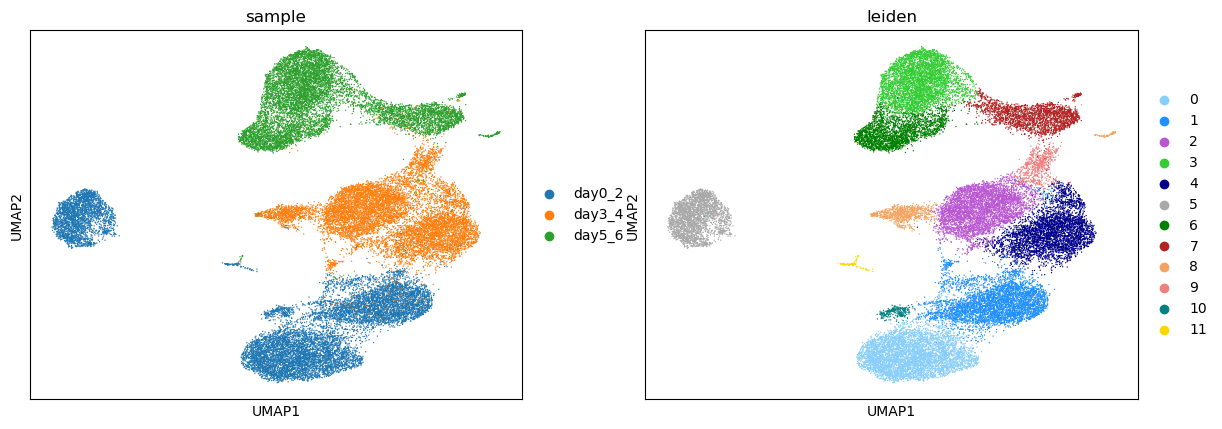

In [8]:
sc.pl.umap(adata, color=["sample", "leiden"])

In [17]:
cell_type_annotation = {'5': 'Naive',
                                '10': 'early_ActB',
                                '9': 'early_PB',
                                '8': 'unknown_rpl_hi',
                                '3': 'GC_1',
                                '11': 't_cells',
                                '1': 'ActB_2',
                                '0': 'ActB_1',
                                '7': 'PB_1',
                                '4': 'ActB_3',
                                '6': 'GC_2',
                                '2': 'ActB_4'}

# Ensure 'leiden' is categorical
adata.obs['leiden'] = adata.obs['leiden'].astype('category')

# Use rename_categories for categorical replacement
adata.obs['cell_type_annotation'] = adata.obs['leiden'].cat.rename_categories(cell_type_annotation)

adata.obs['cell_type_annotation'].unique()

['Naive', 'GC_1', 'ActB_2', 'ActB_1', 'unknown_rpl_hi', ..., 'PB_1', 'ActB_3', 'early_PB', 'early_ActB', 't_cells']
Length: 12
Categories (12, object): ['ActB_1', 'ActB_2', 'ActB_4', 'GC_1', ..., 'unknown_rpl_hi', 'early_PB', 'early_ActB', 't_cells']

In [18]:
adata

AnnData object with n_obs × n_vars = 32418 × 23090
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden', 'leiden_filtered_cells', 'sample', 'cell_type_annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_major_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'topic_dendogram', 'umap', 'sample_colors'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'topic_feature_activations', '

In [19]:
adata.write("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/h5_files/donor1_multiome_gex_post_mira.h5ad")

# process atac data

In [20]:
adata_atac = sc.read_h5ad("/media/RAIDArray/JingyuFan/projects/human_B_cell/multiome_230104/multiome_1st_donor_UPMC_aggr/MIRA_out/adata_aggregated_peak.leiden.h5ad")

In [21]:
adata_atac

AnnData object with n_obs × n_vars = 32418 × 191255
    obs: 'cell_type_major', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'cell_index', 'leiden_joint'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'topic_dendogram'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'

In [22]:
# Remove specified slots from adata_atac.obs
slots_to_remove = [
    'leiden_joint']

# Create a new AnnData object without the specified columns
adata_atac.obs = adata_atac.obs.drop(columns=slots_to_remove, errors='ignore')

adata_atac

AnnData object with n_obs × n_vars = 32418 × 191255
    obs: 'cell_type_major', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'cell_index'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'topic_dendogram'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'

In [23]:
adata_atac.obs['sample'] = adata_atac.obs['cell_type_major'].copy()

In [24]:
(adata_atac.obs_names == adata.obs_names).sum()

32418

In [25]:
adata_atac.obs['leiden'] = adata.obs['leiden'].copy()
adata_atac.uns['leiden_colors'] = adata.uns['leiden_colors'].copy()
adata_atac.obs['cell_type_annotation'] = adata.obs['cell_type_annotation'].copy()
adata_atac.obs['leiden_filtered_cells'] = adata.obs['leiden_filtered_cells'].copy()
adata_atac.obsm['X_umap'] = adata.obsm['X_umap'].copy()

In [26]:
adata_atac.obs['cell_type_annotation'].unique()

['Naive', 'GC_1', 'ActB_2', 'ActB_1', 'unknown_rpl_hi', ..., 'PB_1', 'ActB_3', 'early_PB', 'early_ActB', 't_cells']
Length: 12
Categories (12, object): ['ActB_1', 'ActB_2', 'ActB_4', 'GC_1', ..., 'unknown_rpl_hi', 'early_PB', 'early_ActB', 't_cells']

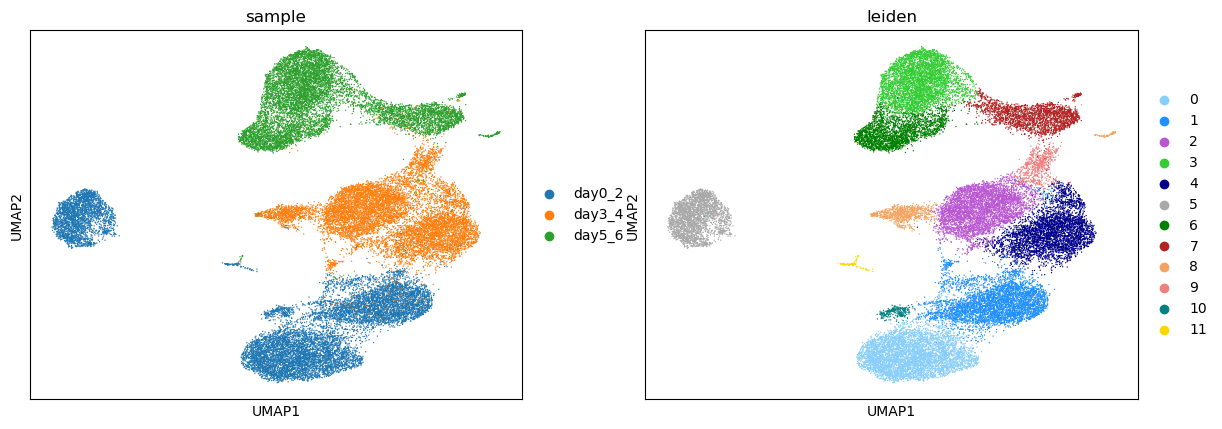

In [27]:
sc.pl.umap(adata_atac, color=["sample", "leiden"])

In [28]:
adata_atac.write("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/h5_files/donor1_multiome_atac_post_mira.h5ad")